In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# import pregnancy data
df = pd.read_csv('https://people.sc.fsu.edu/~jburkardt/data/csv/freshman_kgs.csv')
df.head()

,Sex,"""Weight (Sep)""","""Weight (Apr)""","""BMI (Sep)""","""BMI (Apr)"""
0,M,72,59,22.02,18.14
1,M,97,86,19.70,17.44
2,M,74,69,24.09,22.43
3,M,93,88,26.97,25.57
4,F,68,64,21.51,20.10


In [34]:
collist = [c.strip() for c in df.columns.tolist()]
collist = [c.strip('"') for c in collist]

In [36]:
df.columns = collist

# Read, Clean, Validate

In [38]:
# compare my result with codebook
# value_counts()

df['Sex'].value_counts().sort_index()

F    35
M    32
Name: Sex, dtype: int64

In [20]:
# describe()

df.describe()

,"""Weight (Sep)""","""Weight (Apr)""","""BMI (Sep)""","""BMI (Apr)"""
count,67.000000,67.000000,67.000000,67.000000
mean,65.059701,66.238806,22.030000,22.484179
std,11.285390,11.284327,3.308901,3.602527
min,42.000000,47.000000,15.080000,16.890000
25%,56.500000,58.000000,19.965000,20.230000
50%,64.000000,66.000000,21.730000,22.310000
75%,70.500000,70.000000,23.160000,23.860000
max,97.000000,105.000000,36.570000,40.860000


In [40]:
# replace the value 'M' with NaN
df['Sex'].replace('M', np.nan, inplace = True)

# print the values and their frequencies
df['Sex'].value_counts()

F    35
Name: Sex, dtype: int64

In [41]:
# select the column and divide by 100
weight_by_100 = df['Weight (Sep)'] / 100
weight_by_100

0     0.72
1     0.97
2     0.74
3     0.93
4     0.68
      ... 
62    0.65
63    0.75
64    0.42
65    0.74
66    0.94
Name: Weight (Sep), Length: 67, dtype: float64

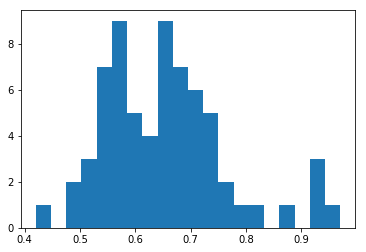

In [47]:
# plot the histogram

# bins, divide range into 20 intervals
plt.hist(x= weight_by_100, bins=20)

plt.show()

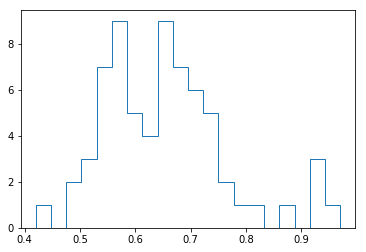

In [48]:
# plot the histogram

# histtype
plt.hist(x= weight_by_100, bins=20, histtype = 'step')

plt.show()

In [52]:
# filter

# weight(Sep) > 70
sep_o70 = df['Weight (Sep)'] > 70

# weight(Apr) < 70
apr_l70 = df['Weight (Apr)'] < 70

# compute the number of women who weighed over 70 in September and weighed less than 70 in April
women_70 = df[sep_o70 & apr_l70]
print('The number of women who weighed over 70 in Sep and weighed less than 70 in April : ', women_70.shape[0])

The number of women who weighed over 70 in Sep and weighed less than 70 in April :  3


# Distribution

In [71]:
gss = pd.read_hdf('gss.hdf5', 'gss')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


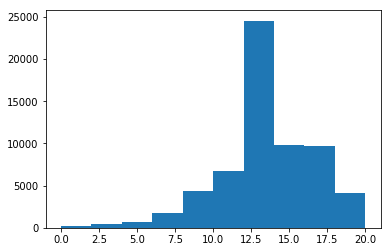

In [74]:
# plot histogram
educ = gss['educ']

plt.hist(educ.dropna(), label='educ')
plt.show()

In [81]:
# histogram is not the best to show the distribution of this data.
#!pip install empiricaldist

# import Pmf from empiricaldist library
from empiricaldist import Pmf


# PMF

In [104]:
# PMF (Probability Mass Function) : unique values in the dataset, the probability that you get each value
pmf_age = Pmf.from_seq(gss['age'], normalize=True)

In [108]:
# count the number of frequency
pmf_age_nn = Pmf.from_seq(gss['age'], normalize = False)
pmf_age_nn.head()
# 18 years olds appeared 350 times.

,probs
18.0,350
19.0,1238
20.0,1128


In [110]:
350/pmf_age_nn.sum()

0.005619691398660908

In [111]:
pmf_age.head()

,probs
18.0,0.005620
19.0,0.019878
20.0,0.018111


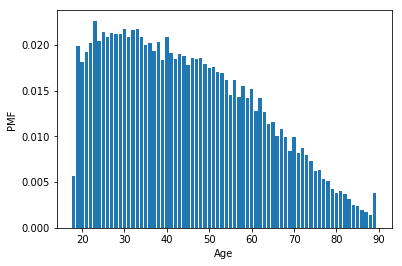

In [105]:
# plot the PMF
pmf_age.bar(label = 'age')

# label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

# CDF

## CDF (Cumulative Distribution Function) : the probability that you get a value <= X

Example

PMF of {1,2,2,3,5,5}

PMF(1) = 1/6 <br>
PMF(2) = 2/6 <br>
PMF(3) = 1/6 <br>
PMF(5) = 2/6 <br>

CDF

CDF(1) = 1/6 <br>
CDF(2) = 3/6  the probability of the value less or equal to 2 <br>
CDF(3) = 4/6 <br>
CDF(5) = 6/6 = 1

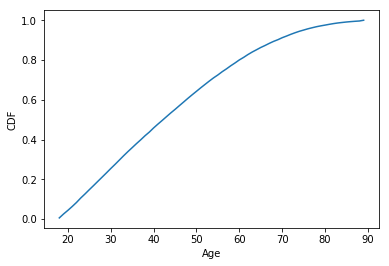

In [115]:
from empiricaldist import Cdf

# plot CDF of age
cdf = Cdf.from_seq(gss['age'])
cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

In [117]:
# the probability that the respondent is 51 year olds
q = 51
p = cdf[q]
print(p)

0.6602013455146835


This means 66% of the respondents are 51 years old or younger. 

In [119]:
# find the value that have a specific probability 

# 25 percentile
p = 0.25
q = cdf.inverse(p)
print(q)

30.0


This indicates 30% of the respondents are age 30 or less.

In [121]:
# 75 percentile
p = 0.75
q = cdf.inverse(p)
print(q)

57.0


75% of the respondents are 57 or younger.

The distance between 25th to the 75th percentile is called IQR (interquartile range). <br>
It measures the spread of the distribution. <br>
It doesn't get thrown off by extreme values or outliers, the way variance does.

In [123]:
cdf = Cdf.from_seq(gss['realinc'])
cdf_25th = cdf.inverse(0.25)
cdf_75th = cdf.inverse(0.75)

IQR = cdf_75th - cdf_25th
print(IQR)

29676.0


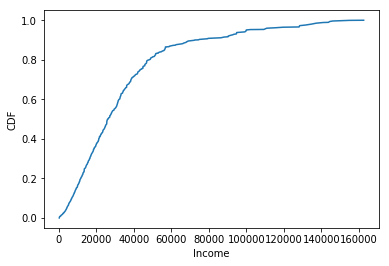

In [124]:
# plot cdf of income
cdf.plot()
plt.xlabel('Income')
plt.ylabel('CDF')
plt.show()

In [128]:
# what fraction of respondents report that they have 12 years of education or fewer?
cdf_educ = cdf.from_seq(gss['educ'])

print('Answer:', round(cdf_educ[12] *100), ' %')

Answer: 53.0  %


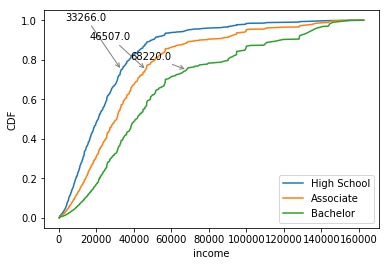

In [160]:
# Plot income CDFs
# see what the distribution of incomes looks like for people with different education levels. 

high = (gss['educ'] <= 12)
associate = (gss['educ'] >= 14) & (gss['educ'] < 16)
bachelor = (gss['educ'] >=16)

income = gss['realinc']

cdf_high = Cdf.from_seq(income[high])
cdf_asso = Cdf.from_seq(income[associate])
cdf_bach = Cdf.from_seq(income[bachelor])

cdf_high.plot(label = 'High School')
cdf_asso.plot(label = 'Associate')
cdf_bach.plot(label = 'Bachelor')

# label the axes
plt.xlabel('income')
plt.ylabel('CDF')

# annotate 75 percentile people's income in each group
for i, inc in enumerate([cdf_high, cdf_asso, cdf_bach]):
    plt.annotate(str(inc.inverse(0.75)), xy = (inc.inverse(0.75), 0.75), xytext = (inc.inverse(0.75) - 30000, 1 - i/10), arrowprops = {'arrowstyle': '->', 'color':'gray'})

plt.legend()
plt.show()

In [133]:
print(cdf_high.inverse(0.75), cdf_asso.inverse(0.75), cdf_bach.inverse(0.75))

33266.0 46507.0 68220.0
